In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, r2_score
import itertools

In [ ]:
data = pd.read_csv('student-mat.csv', sep=";")

In [4]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
data['school'].unique()

array(['GP', 'MS'], dtype=object)

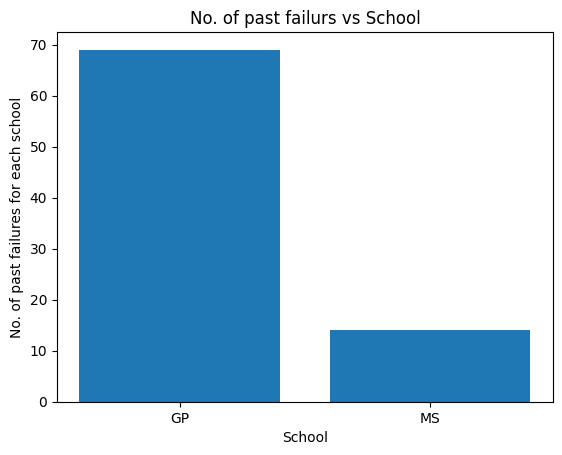

In [ ]:
fig, ax = plt.subplots()

ax.bar(data['school'].unique(), [len(data[(data['school'] == "GP") & (data['failures']>0)].index), len(data[(data['school'] == "MS") & (data['failures']>0)].index)])

ax.set_ylabel('No. of past failures for each school')
ax.set_xlabel('School')
ax.set_title('No. of past failurs vs School')

plt.show()

In [ ]:
data['sex'].unique()

array(['F', 'M'], dtype=object)

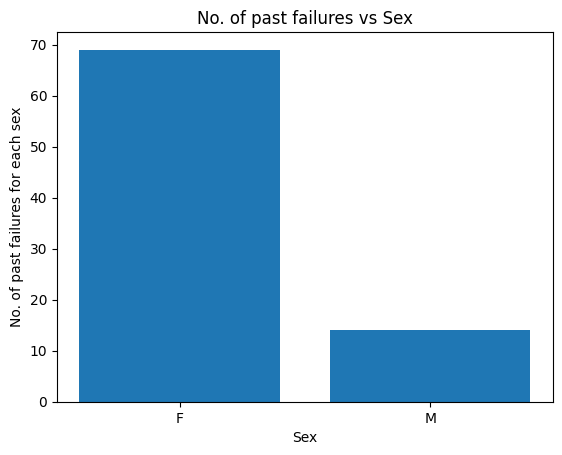

In [ ]:
fig, ax = plt.subplots()

ax.bar(data['sex'].unique(), [len(data[(data['school'] == "GP") & (data['failures']>0)].index), len(data[(data['school'] == "MS") & (data['failures']>0)].index)])

ax.set_ylabel('No. of past failures for each sex')
ax.set_xlabel('Sex')
ax.set_title('No. of past failures vs Sex')

plt.show()

In [ ]:
data['address'].unique()

array(['U', 'R'], dtype=object)

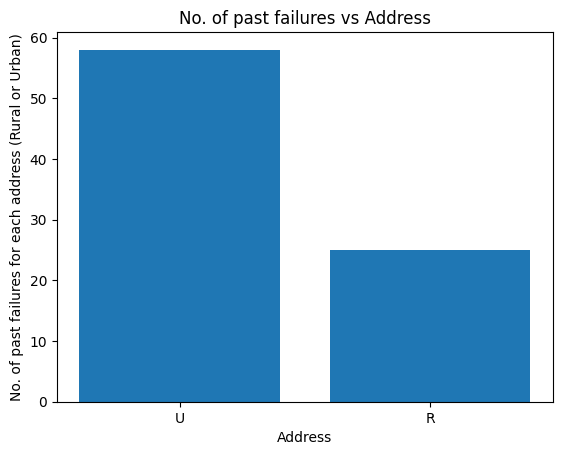

In [ ]:
fig, ax = plt.subplots()

ax.bar(data['address'].unique(), [len(data[(data['address'] == "U") & (data['failures']>0)].index), len(data[(data['address'] == "R") & (data['failures']>0)].index)])

ax.set_ylabel('No. of past failures for each address (Rural or Urban)')
ax.set_xlabel('Address')
ax.set_title('No. of past failures vs Address')

plt.show()

In [ ]:
data['famsize'].unique()

array(['GT3', 'LE3'], dtype=object)

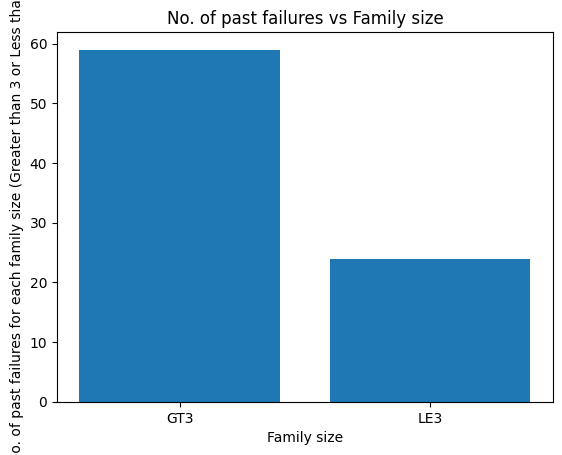

In [ ]:
fig, ax = plt.subplots()

ax.bar(data['famsize'].unique(), [len(data[(data['famsize'] == "GT3") & (data['failures']>0)].index), len(data[(data['famsize'] == "LE3") & (data['failures']>0)].index)])

ax.set_ylabel('No. of past failures for each family size (Greater than 3 or Less than 3)')
ax.set_xlabel('Family size')
ax.set_title('No. of past failures vs Family size')

plt.show()

In [ ]:
data['Pstatus'].unique()

array(['A', 'T'], dtype=object)

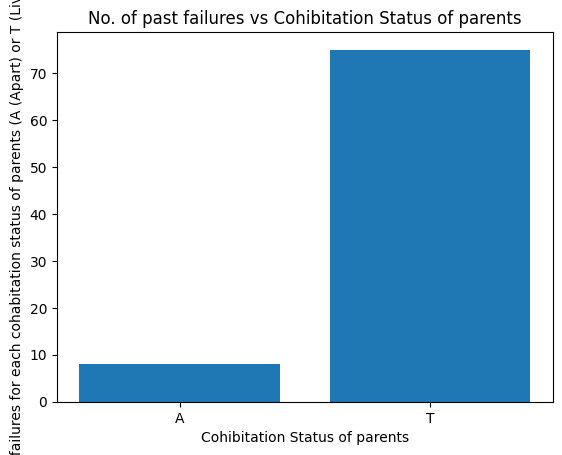

In [ ]:
fig, ax = plt.subplots()

ax.bar(data['Pstatus'].unique(), [len(data[(data['Pstatus'] == "A") & (data['failures']>0)].index), len(data[(data['Pstatus'] == "T") & (data['failures']>0)].index)])

ax.set_ylabel('No. of past failures for each cohabitation status of parents (A (Apart) or T (Living together))')
ax.set_xlabel('Cohibitation Status of parents')
ax.set_title('No. of past failures vs Cohibitation Status of parents')

plt.show()

In [ ]:
travel_times = [len(data[(data['traveltime'] == n) & (data['failures']>0)].index) for n in data['traveltime'].unique().tolist()]
study_times = [len(data[(data['studytime'] == n) & (data['failures']>0)].index) for n in data['studytime'].unique().tolist()]

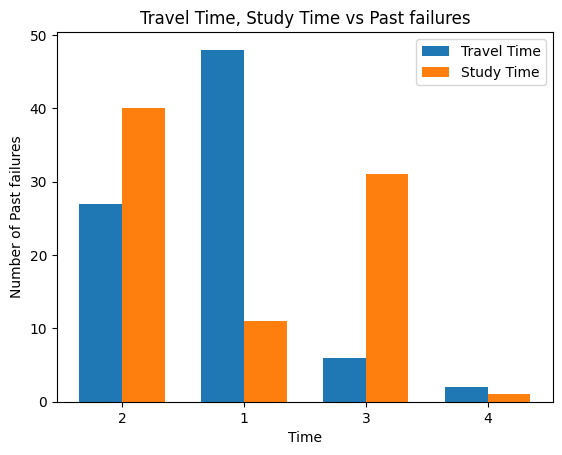

In [ ]:
bar_width = 0.35

index = np.arange(max(len(data['traveltime'].unique()), len(data['studytime'].unique())))

fig, ax = plt.subplots()

ax.bar(index, travel_times, bar_width, label='Travel Time')
ax.bar(index + bar_width, study_times, bar_width, label='Study Time')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data['traveltime'].unique())

ax.set_title('Travel Time, Study Time vs Past failures')
ax.set_xlabel('Time')
ax.set_ylabel('Number of Past failures')
ax.legend()

plt.show()

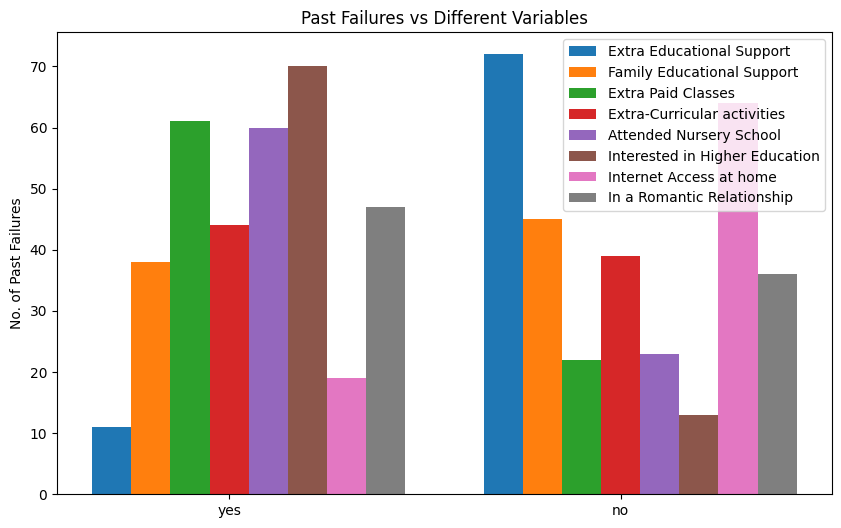

In [ ]:
schools_up = [len(data[(data['schoolsup'] == i) & (data['failures'] > 0)].index) for i in data['schoolsup'].unique()]
famsup = [len(data[(data['famsup'] == i) & (data['failures'] > 0)].index) for i in data['famsup'].unique()]
paid = [len(data[(data['paid'] == i) & (data['failures'] > 0)].index) for i in data['paid'].unique()]
activities = [len(data[(data['activities'] == i) & (data['failures'] > 0)].index) for i in data['activities'].unique()]
nursery = [len(data[(data['nursery'] == i) & (data['failures'] > 0)].index) for i in data['nursery'].unique()]
higher = [len(data[(data['higher'] == i) & (data['failures'] > 0)].index) for i in data['higher'].unique()]
internet = [len(data[(data['internet'] == i) & (data['failures'] > 0)].index) for i in data['internet'].unique()]
romantic = [len(data[(data['romantic'] == i) & (data['failures'] > 0)].index) for i in data['romantic'].unique()]

labels = ['yes', 'no']

bar_width = 0.10

index = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(index, schools_up, bar_width, label='Extra Educational Support')
ax.bar(index + bar_width, famsup, bar_width, label='Family Educational Support')
ax.bar(index + 2 * bar_width, paid, bar_width, label='Extra Paid Classes')
ax.bar(index + 3 * bar_width, activities, bar_width, label='Extra-Curricular activities')
ax.bar(index + 4 * bar_width, nursery, bar_width, label='Attended Nursery School')
ax.bar(index + 5 * bar_width, higher, bar_width, label='Interested in Higher Education')
ax.bar(index + 6 * bar_width, internet, bar_width, label='Internet Access at home')
ax.bar(index + 7 * bar_width, romantic, bar_width, label='In a Romantic Relationship')

ax.set_xticks(index + 3*bar_width)
ax.set_xticklabels(labels)

ax.set_title('Past Failures vs Different Variables')
ax.set_ylabel('No. of Past Failures')
ax.legend()

plt.show()

In [ ]:
medu_unique = set(data['Medu'].unique())
fedu_unique = set(data['Fedu'].unique())

# Create all combinations without duplicates
M_edu_F_edu_combinations = list(itertools.product(medu_unique, fedu_unique))

In [ ]:
medu_fedu_dict = {}

for m,f in M_edu_F_edu_combinations:
  medu_fedu_dict[(m, f)] = 0
  count = 0
  for index, row in data.iterrows():
    if row['Medu'] == m and row['Fedu'] == f:
      count = count + row['failures']
  medu_fedu_dict[(m, f)] = count

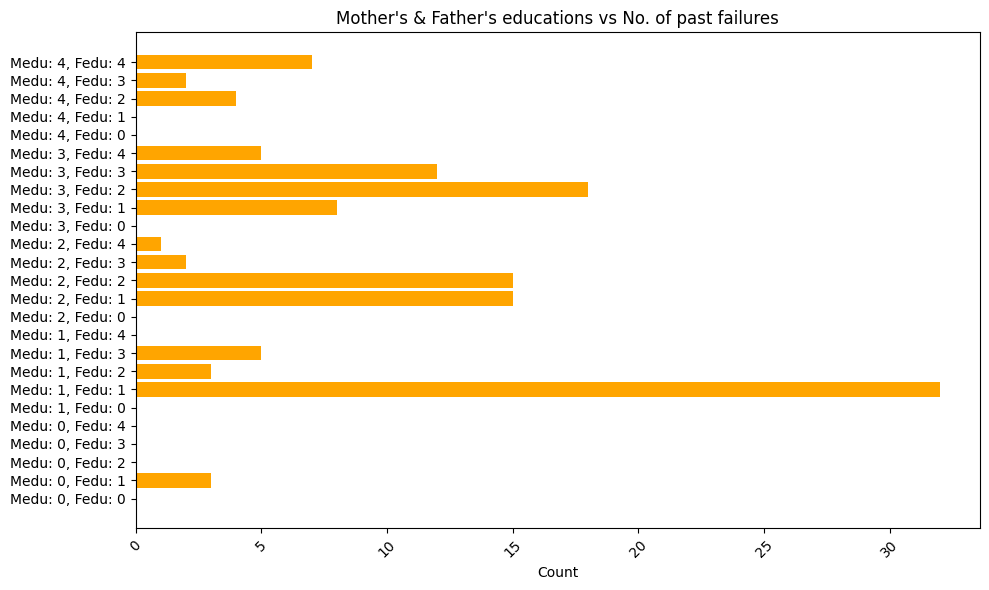

In [ ]:
labels = [f'Medu: {key[0]}, Fedu: {key[1]}' for key in medu_fedu_dict.keys()]
values = list(medu_fedu_dict.values())

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='orange')
plt.xlabel('Count')
plt.title("Mother's & Father's educations vs No. of past failures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
mjob_unique = set(data['Mjob'].unique())
fjob_unique = set(data['Fjob'].unique())

# Create all combinations without duplicates
M_job_F_job_combinations = list(itertools.product(mjob_unique, fjob_unique))

In [ ]:
mjob_fjob_dict = {}

for m,f in M_job_F_job_combinations:
  mjob_fjob_dict[(m, f)] = 0
  count = 0
  for index, row in data.iterrows():
    if row['Mjob'] == m and row['Fjob'] == f:
      count = count + row['failures']
  mjob_fjob_dict[(m, f)] = count

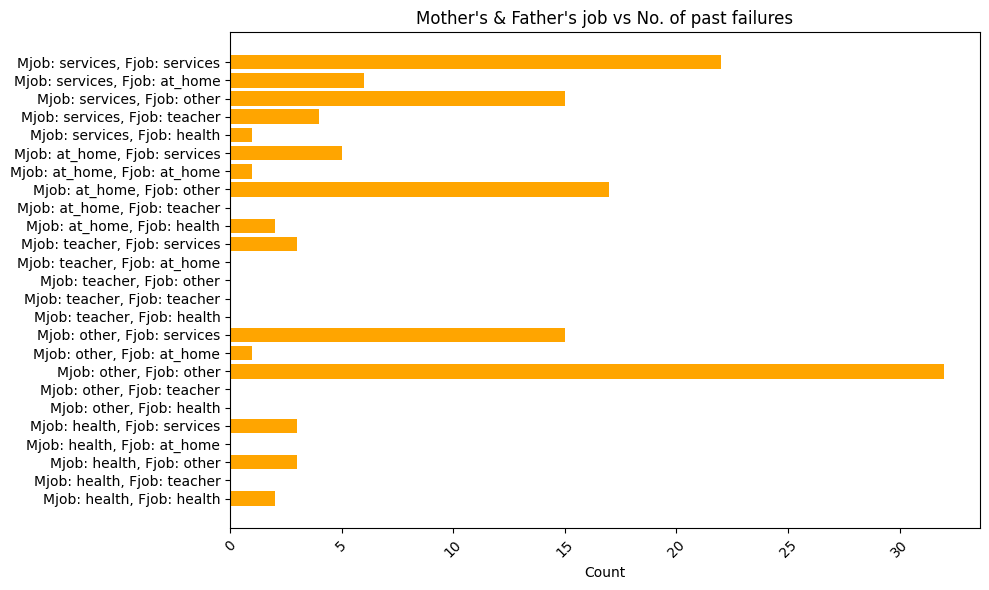

In [ ]:
labels = [f'Mjob: {key[0]}, Fjob: {key[1]}' for key in mjob_fjob_dict.keys()]
values = list(mjob_fjob_dict.values())

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='orange')
plt.xlabel('Count')
plt.title("Mother's & Father's job vs No. of past failures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

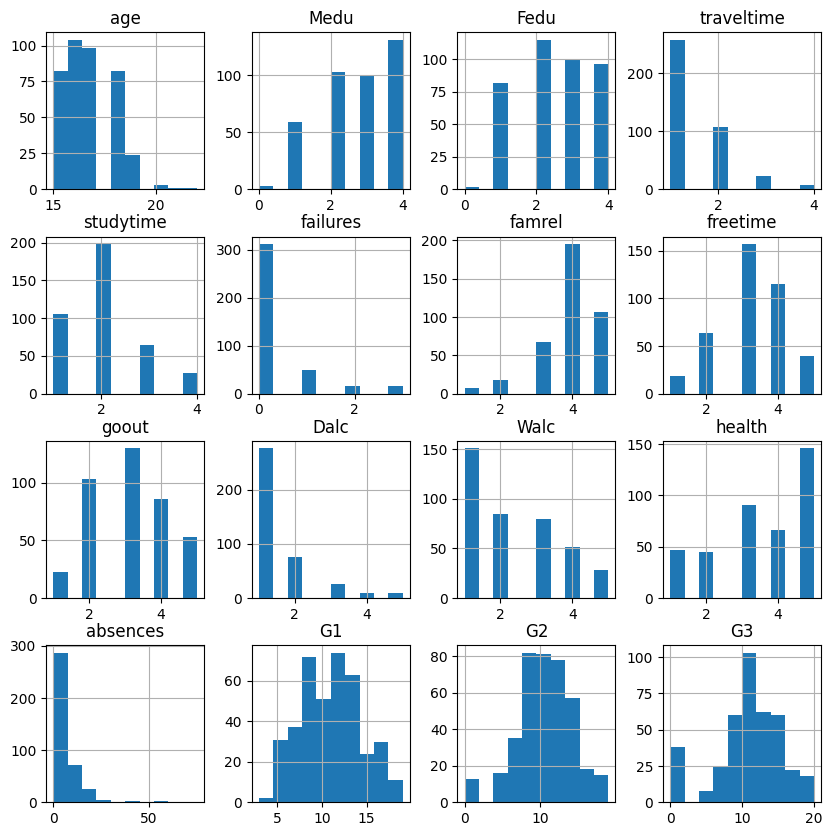

In [ ]:
data.hist(figsize = (10,10))
plt.show()

## Data Pre-processing

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
data.isna().any()

,0
school,False
sex,False
age,False
address,False
famsize,False
Pstatus,False
Medu,False
Fedu,False
Mjob,False
Fjob,False


## Encoding categorical input variables

In [5]:
def encoding_categorical_variables(data):

  all_cols = data.columns.tolist()

  encoder = OrdinalEncoder(categories=[['at_home', 'teacher', 'health','services','other']])
  data[['Mjob']] = encoder.fit_transform(data[['Mjob']]).astype('int64')
  data[['Fjob']] = encoder.fit_transform(data[['Fjob']]).astype('int64')

  encoder = OrdinalEncoder(categories=[['other', 'mother', 'father']])
  data[['guardian']] = encoder.fit_transform(data[['guardian']]).astype('int64')

  encoder = OrdinalEncoder(categories=[['home', 'reputation', 'course', 'other']])
  data[['reason']] = encoder.fit_transform(data[['reason']]).astype('int64')

  encoder = OrdinalEncoder(categories=[['no', 'yes']])
  data[['schoolsup']] = encoder.fit_transform(data[['schoolsup']]).astype('int64')
  data[['famsup']] = encoder.fit_transform(data[['famsup']]).astype('int64')
  data[['paid']] = encoder.fit_transform(data[['paid']]).astype('int64')
  data[['activities']] = encoder.fit_transform(data[['activities']]).astype('int64')
  data[['nursery']] = encoder.fit_transform(data[['nursery']]).astype('int64')
  data[['higher']] = encoder.fit_transform(data[['higher']]).astype('int64')
  data[['internet']] = encoder.fit_transform(data[['internet']]).astype('int64')
  data[['romantic']] = encoder.fit_transform(data[['romantic']]).astype('int64')

  categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus']
  categorical_data = data[categorical_cols]

  encoder = OneHotEncoder(sparse_output=False)
  encoded_data = encoder.fit_transform(categorical_data).astype('int64')

  data_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

  numeric_cols = [col for col in all_cols if col not in categorical_cols]

  data = pd.concat([data_encoded, data[numeric_cols]], axis=1)

  # Droping column 'age' as G3 scores are independent of 'age'
  data.drop('age', axis=1, inplace=True)

  return data

## Encoding target variable

In [6]:
def target_variable_encoding(data, data_test):

  # For binary classification tasks, according to the research paper, pass is considered if G3 >= 10, else fail
  for index, row in data.iterrows():
    if row['G3'] >= 10:
      data.at[index, 'G3'] = 1
    else:
      data.at[index, 'G3'] = 0

  for index, row in data_test.iterrows():
    if row['G3'] >= 10:
      data_test.at[index, 'G3'] = 1
    else:
      data_test.at[index, 'G3'] = 0

  return [data, data_test]

## Set B of prediction - Dropping G2 scores

In [7]:
def drop_G2(data, data_test):

  data_without_G2 = data.drop('G2', axis=1)
  data_test_without_G2 = data_test.drop('G2', axis=1)

  return [data_without_G2, data_test_without_G2]

## Set C of prediction - Dropping both G1, G2 scores

In [8]:
def drop_G1_G2(data, data_test):

  data_without_G1_G2 = data.drop(['G1', 'G2'], axis=1)
  data_test_without_G1_G2 = data_test.drop(['G1', 'G2'], axis=1)

  return [data_without_G1_G2, data_test_without_G1_G2]

## Models

In [9]:
# Random Forest model for classification

def rf_binary_classifier(X_train, y_train, X_test, y_test, inp_set, df_resultant_binary_clf):

  random_forest_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0).fit(X_train, y_train.ravel())
  y_pred = random_forest_clf.predict(X_test)
  testing_accuracy = round(accuracy_score(y_test, y_pred), 2)
  f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
  precision = round(precision_score(y_test, y_pred, average='macro'), 2)
  recall = round(recall_score(y_test, y_pred, average='macro'), 2)
  df_resultant_binary_clf.loc[len(df_resultant_binary_clf)] = [inp_set, 'Random Forest Classifier', testing_accuracy, f1, precision, recall]

  return df_resultant_binary_clf

In [10]:
# SVM model for classification

def svm_binary_classifier(X_train, y_train, X_test, y_test, inp_set, df_resultant_binary_clf):

  svm_classifier = SVC(kernel = 'linear', random_state = 0).fit(X_train, y_train.ravel())
  y_pred = svm_classifier.predict(X_test)
  testing_accuracy = round(accuracy_score(y_test, y_pred), 2)
  f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
  precision = round(precision_score(y_test, y_pred, average='macro'), 2)
  recall = round(recall_score(y_test, y_pred, average='macro'), 2)
  df_resultant_binary_clf.loc[len(df_resultant_binary_clf)] = [inp_set, 'SVM', testing_accuracy, f1, precision, recall]

  return df_resultant_binary_clf

In [11]:
# Decision Tree model for classification

def dt_binary_classifier(X_train, y_train, X_test, y_test, inp_set, df_resultant_binary_clf):

  decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train, y_train)
  y_pred = decision_tree_classifier.predict(X_test)
  testing_accuracy = round(accuracy_score(y_test, y_pred), 2)
  f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
  precision = round(precision_score(y_test, y_pred, average='macro'), 2)
  recall = round(recall_score(y_test, y_pred, average='macro'), 2)
  df_resultant_binary_clf.loc[len(df_resultant_binary_clf)] = [inp_set, 'Decision Tree Classifier', testing_accuracy, f1, precision, recall]

  return df_resultant_binary_clf

In [12]:
# Random Forest Regressor model to predict scores using regression

def rf_regressor(X_train, y_train, X_test, y_test, inp_set, df_resultant_regression):

  random_forest_reg = RandomForestRegressor(criterion='squared_error', random_state=0).fit(X_train, y_train.ravel())
  score = random_forest_reg.score(X_test, y_test)
  y_pred = random_forest_reg.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = math.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  df_resultant_regression.loc[len(df_resultant_regression)] = [inp_set, 'Random Forest Regressor', score, r2, mse, rmse]

  return df_resultant_regression

In [13]:
# Support Vector Regressor model to predict scores using regression

def sv_regressor(X_train, y_train, X_test, y_test, inp_set, df_resultant_regression):

  sv_reg = SVR(kernel='rbf').fit(X_train, y_train.reshape(-1))
  score = sv_reg.score(X_test, y_test)
  y_pred = sv_reg.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = math.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  df_resultant_regression.loc[len(df_resultant_regression)] = [inp_set, 'Support Vector Regressor', score, r2, mse, rmse]

  return df_resultant_regression

In [14]:
# Decision Tree Regressor model to predict scores using regression

def dt_regressor(X_train, y_train, X_test, y_test, inp_set, df_resultant_regression):

  decision_tree_reg = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
  score = decision_tree_reg.score(X_test, y_test)
  y_pred = decision_tree_reg.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = math.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  df_resultant_regression.loc[len(df_resultant_regression)] = [inp_set, 'Decision Tree Regressor', score, r2, mse, rmse]

  return df_resultant_regression

## Test-Train data split

In [15]:
def test_train_split(data):

  # Out of 395 samples, 80 random samples are considered for the test set, and remaining ones for training.
  test_data_indices = random.sample(range(394), 80)

  data_test = data.iloc[test_data_indices].copy()
  data.drop(index=test_data_indices, inplace=True)

  data_test.reset_index(drop=True, inplace=True)
  data.reset_index(drop=True, inplace=True)

  return [data, data_test]

## Feature Scaling

In [16]:
def feature_scaling(data, data_test):

  # All these columns are considered for feature scaling, to bring their value between 0 & 1
  feature_scaling_cols = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
                          'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

  scaler = MinMaxScaler()

  data[feature_scaling_cols] = scaler.fit_transform(data[feature_scaling_cols])

  data_test[feature_scaling_cols] = scaler.transform(data_test[feature_scaling_cols])

  return [data, data_test]

## Splitting data into train & test set arrays

In [17]:
def train_test_split_arrays(data, data_test):

  X_train = data.iloc[:, :-1].values

  # The target variable variable 'G3' is considered as 'y'
  y_train = data.iloc[:, -1:].values


  X_test = data_test.iloc[:, :-1].values
  y_test = data_test.iloc[:, -1:].values

  return [X_train, y_train, X_test, y_test]

## Data Pre-processing

In [18]:
data = encoding_categorical_variables(data)

In [19]:
data, data_test = test_train_split(data)

In [20]:
data, data_test = feature_scaling(data, data_test)

In [21]:
data

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,1,0,0,1,1,0,1,0,...,0.75,0.50,0.75,0.00,0.00,0.50,0.107143,0.000000,0.315789,6
1,1,0,1,0,0,1,1,0,0,1,...,1.00,0.50,0.50,0.00,0.00,0.50,0.071429,0.000000,0.263158,6
2,1,0,1,0,0,1,0,1,0,1,...,0.75,0.50,0.25,0.25,0.50,0.50,0.178571,0.142857,0.421053,10
3,1,0,1,0,0,1,1,0,0,1,...,0.50,0.25,0.25,0.00,0.00,1.00,0.035714,0.714286,0.736842,15
4,1,0,1,0,0,1,1,0,0,1,...,0.75,0.50,0.25,0.00,0.25,1.00,0.071429,0.071429,0.526316,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,0,1,0,1,0,1,1,0,...,1.00,1.00,0.75,0.75,1.00,0.75,0.196429,0.285714,0.473684,9
311,0,1,0,1,0,1,0,1,0,1,...,0.25,0.75,1.00,0.50,0.75,0.25,0.053571,0.642857,0.842105,16
312,0,1,0,1,1,0,1,0,0,1,...,1.00,1.00,0.50,0.50,0.50,0.50,0.053571,0.357143,0.421053,7
313,0,1,0,1,1,0,0,1,0,1,...,0.75,0.75,0.00,0.50,0.75,1.00,0.000000,0.428571,0.631579,10


## Resultant df for regression predictions

In [22]:
df_resultant_regression = pd.DataFrame(columns=["Set", "Model", "Score", "R^2_Score", "MSE", "RMSE"])

## Regression

### Regression - Set A

In [23]:
X_train, y_train, X_test, y_test = train_test_split_arrays(data, data_test)

In [24]:
rf_regressor(X_train, y_train, X_test, y_test, 'A', df_resultant_regression)
sv_regressor(X_train, y_train, X_test, y_test, 'A', df_resultant_regression)
dt_regressor(X_train, y_train, X_test, y_test, 'A', df_resultant_regression)

,Set,Model,Score,R^2_Score,MSE,RMSE
0,A,Random Forest Regressor,0.897450,0.897450,2.542972,1.594670
1,A,Support Vector Regressor,0.459916,0.459916,13.392740,3.659609
2,A,Decision Tree Regressor,0.759552,0.759552,5.962500,2.441823


### Regression - Set B

In [25]:
data_without_G2, data_test_without_G2 = drop_G2(data, data_test)

In [26]:
data_without_G2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,1,0,1,0,0,1,1,0,1,0,...,0,0.75,0.50,0.75,0.00,0.00,0.50,0.107143,0.000000,6
1,1,0,1,0,0,1,1,0,0,1,...,0,1.00,0.50,0.50,0.00,0.00,0.50,0.071429,0.000000,6
2,1,0,1,0,0,1,0,1,0,1,...,0,0.75,0.50,0.25,0.25,0.50,0.50,0.178571,0.142857,10
3,1,0,1,0,0,1,1,0,0,1,...,1,0.50,0.25,0.25,0.00,0.00,1.00,0.035714,0.714286,15
4,1,0,1,0,0,1,1,0,0,1,...,0,0.75,0.50,0.25,0.00,0.25,1.00,0.071429,0.071429,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,0,1,0,1,0,1,1,0,...,0,1.00,1.00,0.75,0.75,1.00,0.75,0.196429,0.285714,9
311,0,1,0,1,0,1,0,1,0,1,...,0,0.25,0.75,1.00,0.50,0.75,0.25,0.053571,0.642857,16
312,0,1,0,1,1,0,1,0,0,1,...,0,1.00,1.00,0.50,0.50,0.50,0.50,0.053571,0.357143,7
313,0,1,0,1,1,0,0,1,0,1,...,0,0.75,0.75,0.00,0.50,0.75,1.00,0.000000,0.428571,10


In [27]:
data_test_without_G2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,1,0,1,0,0,1,1,0,0,1,...,0,1.00,0.75,0.25,0.25,0.50,1.00,0.000000,0.785714,17
1,1,0,0,1,0,1,1,0,0,1,...,1,0.50,0.25,0.25,0.00,0.50,0.50,0.035714,0.357143,12
2,1,0,1,0,1,0,1,0,1,0,...,0,1.00,0.75,0.50,0.00,0.25,1.00,0.214286,0.642857,13
3,1,0,0,1,0,1,1,0,0,1,...,1,0.75,0.75,0.75,0.00,0.00,0.50,0.357143,0.714286,13
4,1,0,0,1,0,1,1,0,0,1,...,0,1.00,1.00,0.75,0.50,1.00,0.25,0.000000,0.142857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,1,0,1,1,0,1,0,0,1,...,0,0.50,0.50,0.75,0.25,0.75,0.50,0.071429,0.357143,10
76,0,1,0,1,1,0,1,0,0,1,...,1,0.75,1.00,1.00,0.00,0.50,0.25,0.071429,0.571429,11
77,1,0,0,1,0,1,1,0,0,1,...,0,0.75,0.25,0.75,0.25,0.75,0.00,0.035714,0.642857,13
78,1,0,1,0,0,1,1,0,0,1,...,1,0.75,0.75,0.50,0.00,0.50,0.75,0.000000,0.571429,15


In [28]:
X_train, y_train, X_test, y_test = train_test_split_arrays(data_without_G2, data_test_without_G2)

In [29]:
rf_regressor(X_train, y_train, X_test, y_test, 'B', df_resultant_regression)
sv_regressor(X_train, y_train, X_test, y_test, 'B', df_resultant_regression)
dt_regressor(X_train, y_train, X_test, y_test, 'B', df_resultant_regression)

,Set,Model,Score,R^2_Score,MSE,RMSE
0,A,Random Forest Regressor,0.897450,0.897450,2.542972,1.594670
1,A,Support Vector Regressor,0.459916,0.459916,13.392740,3.659609
2,A,Decision Tree Regressor,0.759552,0.759552,5.962500,2.441823
3,B,Random Forest Regressor,0.742865,0.742865,6.376304,2.525134
4,B,Support Vector Regressor,0.301951,0.301951,17.309873,4.160514
5,B,Decision Tree Regressor,0.544813,0.544813,11.287500,3.359687


### Regression - Set C

In [30]:
data_without_G1_G2, data_test_without_G1_G2 = drop_G1_G2(data, data_test)

In [31]:
data_without_G1_G2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,1,0,1,0,0,1,1,0,1,0,...,0,0,0.75,0.50,0.75,0.00,0.00,0.50,0.107143,6
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1.00,0.50,0.50,0.00,0.00,0.50,0.071429,6
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0.75,0.50,0.25,0.25,0.50,0.50,0.178571,10
3,1,0,1,0,0,1,1,0,0,1,...,1,1,0.50,0.25,0.25,0.00,0.00,1.00,0.035714,15
4,1,0,1,0,0,1,1,0,0,1,...,0,0,0.75,0.50,0.25,0.00,0.25,1.00,0.071429,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,0,1,0,1,0,1,1,0,...,0,0,1.00,1.00,0.75,0.75,1.00,0.75,0.196429,9
311,0,1,0,1,0,1,0,1,0,1,...,1,0,0.25,0.75,1.00,0.50,0.75,0.25,0.053571,16
312,0,1,0,1,1,0,1,0,0,1,...,0,0,1.00,1.00,0.50,0.50,0.50,0.50,0.053571,7
313,0,1,0,1,1,0,0,1,0,1,...,1,0,0.75,0.75,0.00,0.50,0.75,1.00,0.000000,10


In [32]:
data_test_without_G1_G2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,1,0,1,0,0,1,1,0,0,1,...,0,0,1.00,0.75,0.25,0.25,0.50,1.00,0.000000,17
1,1,0,0,1,0,1,1,0,0,1,...,1,1,0.50,0.25,0.25,0.00,0.50,0.50,0.035714,12
2,1,0,1,0,1,0,1,0,1,0,...,0,0,1.00,0.75,0.50,0.00,0.25,1.00,0.214286,13
3,1,0,0,1,0,1,1,0,0,1,...,1,1,0.75,0.75,0.75,0.00,0.00,0.50,0.357143,13
4,1,0,0,1,0,1,1,0,0,1,...,1,0,1.00,1.00,0.75,0.50,1.00,0.25,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,1,0,1,1,0,1,0,0,1,...,0,0,0.50,0.50,0.75,0.25,0.75,0.50,0.071429,10
76,0,1,0,1,1,0,1,0,0,1,...,1,1,0.75,1.00,1.00,0.00,0.50,0.25,0.071429,11
77,1,0,0,1,0,1,1,0,0,1,...,1,0,0.75,0.25,0.75,0.25,0.75,0.00,0.035714,13
78,1,0,1,0,0,1,1,0,0,1,...,1,1,0.75,0.75,0.50,0.00,0.50,0.75,0.000000,15


In [33]:
X_train, y_train, X_test, y_test = train_test_split_arrays(data_without_G1_G2, data_test_without_G1_G2)

In [34]:
rf_regressor(X_train, y_train, X_test, y_test, 'C', df_resultant_regression)
sv_regressor(X_train, y_train, X_test, y_test, 'C', df_resultant_regression)
dt_regressor(X_train, y_train, X_test, y_test, 'C', df_resultant_regression)

,Set,Model,Score,R^2_Score,MSE,RMSE
0,A,Random Forest Regressor,0.897450,0.897450,2.542972,1.594670
1,A,Support Vector Regressor,0.459916,0.459916,13.392740,3.659609
2,A,Decision Tree Regressor,0.759552,0.759552,5.962500,2.441823
3,B,Random Forest Regressor,0.742865,0.742865,6.376304,2.525134
4,B,Support Vector Regressor,0.301951,0.301951,17.309873,4.160514
5,B,Decision Tree Regressor,0.544813,0.544813,11.287500,3.359687
6,C,Random Forest Regressor,0.345046,0.345046,16.241221,4.030040
7,C,Support Vector Regressor,0.059676,0.059676,23.317691,4.828840
8,C,Decision Tree Regressor,-0.388749,-0.388749,34.437500,5.868347


## Resultant df for binary classification predictions

In [35]:
df_resultant_binary_clf = pd.DataFrame(columns=["Set", "Model", "Testing Accuracy", "F1_Score", "Precision", "Recall"])

## Binary Classification

In [36]:
data, data_test = target_variable_encoding(data, data_test)

### Set A - Binary Classification

In [37]:
X_train, y_train, X_test, y_test = train_test_split_arrays(data, data_test)

In [38]:
rf_binary_classifier(X_train, y_train, X_test, y_test, 'A', df_resultant_binary_clf)
svm_binary_classifier(X_train, y_train, X_test, y_test, 'A', df_resultant_binary_clf)
dt_binary_classifier(X_train, y_train, X_test, y_test, 'A', df_resultant_binary_clf)

,Set,Model,Testing Accuracy,F1_Score,Precision,Recall
0,A,Random Forest Classifier,0.91,0.91,0.91,0.90
1,A,SVM,0.86,0.84,0.89,0.82
2,A,Decision Tree Classifier,0.91,0.90,0.92,0.90


### Set B - Binary Classification

In [39]:
data_without_G2, data_test_without_G2 = drop_G2(data, data_test)

In [40]:
X_train, y_train, X_test, y_test = train_test_split_arrays(data_without_G2, data_test_without_G2)

In [41]:
rf_binary_classifier(X_train, y_train, X_test, y_test, 'B', df_resultant_binary_clf)
svm_binary_classifier(X_train, y_train, X_test, y_test, 'B', df_resultant_binary_clf)
dt_binary_classifier(X_train, y_train, X_test, y_test, 'B', df_resultant_binary_clf)

,Set,Model,Testing Accuracy,F1_Score,Precision,Recall
0,A,Random Forest Classifier,0.91,0.91,0.91,0.90
1,A,SVM,0.86,0.84,0.89,0.82
2,A,Decision Tree Classifier,0.91,0.90,0.92,0.90
3,B,Random Forest Classifier,0.81,0.79,0.82,0.78
4,B,SVM,0.76,0.73,0.76,0.72
5,B,Decision Tree Classifier,0.76,0.73,0.76,0.72


### Set C - Binary Classification

In [42]:
data_without_G1_G2, data_test_without_G1_G2 = drop_G1_G2(data, data_test)

In [43]:
X_train, y_train, X_test, y_test = train_test_split_arrays(data_without_G1_G2, data_test_without_G1_G2)

In [44]:
rf_binary_classifier(X_train, y_train, X_test, y_test, 'C', df_resultant_binary_clf)
svm_binary_classifier(X_train, y_train, X_test, y_test, 'C', df_resultant_binary_clf)
dt_binary_classifier(X_train, y_train, X_test, y_test, 'C', df_resultant_binary_clf)

,Set,Model,Testing Accuracy,F1_Score,Precision,Recall
0,A,Random Forest Classifier,0.91,0.91,0.91,0.90
1,A,SVM,0.86,0.84,0.89,0.82
2,A,Decision Tree Classifier,0.91,0.90,0.92,0.90
3,B,Random Forest Classifier,0.81,0.79,0.82,0.78
4,B,SVM,0.76,0.73,0.76,0.72
5,B,Decision Tree Classifier,0.76,0.73,0.76,0.72
6,C,Random Forest Classifier,0.66,0.57,0.64,0.58
7,C,SVM,0.66,0.54,0.66,0.57
8,C,Decision Tree Classifier,0.59,0.57,0.57,0.58
